In [197]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# url from ESPN to retrieve "Team leaders" of New York Knicks
url = 'https://www.espn.com/nba/team/stats/_/name/ny/new-york-knicks'

r = requests.get(url)

soup = BeautifulSoup(r.content, 'html.parser')

# this is the HTML where our data is a hiding :)
results = soup.find(id='fitt-analytics')

In [60]:
# digging deeper into the HTML
team_leader_results = results.find('section', class_ = 'StatLeaders flex')

In [73]:
player_name = team_leader_results.find_all('span', class_ = 'Athlete__PlayerName')

player_name

[<span class="Athlete__PlayerName">Julius Randle</span>,
 <span class="Athlete__PlayerName">Julius Randle</span>,
 <span class="Athlete__PlayerName">Julius Randle</span>,
 <span class="Athlete__PlayerName">Alec Burks</span>,
 <span class="Athlete__PlayerName">Mitchell Robinson</span>]

In [75]:
role_lead = team_leader_results.find_all('h2', class_ = 'h8 mb2 clr-gray-03')
role_lead

[<h2 class="h8 mb2 clr-gray-03">Points</h2>,
 <h2 class="h8 mb2 clr-gray-03">Rebounds</h2>,
 <h2 class="h8 mb2 clr-gray-03">Assists</h2>,
 <h2 class="h8 mb2 clr-gray-03">Steals</h2>,
 <h2 class="h8 mb2 clr-gray-03">Blocks</h2>]

In [101]:
player_position = team_leader_results.find_all('span', class_ = 'Athlete__NameDetails ml2 clr-gray-04 di ns9')
player_position

[<span class="Athlete__NameDetails ml2 clr-gray-04 di ns9">PF</span>,
 <span class="Athlete__NameDetails ml2 clr-gray-04 di ns9">PF</span>,
 <span class="Athlete__NameDetails ml2 clr-gray-04 di ns9">PF</span>,
 <span class="Athlete__NameDetails ml2 clr-gray-04 di ns9">SG</span>,
 <span class="Athlete__NameDetails ml2 clr-gray-04 di ns9">C</span>]

In [77]:
points = team_leader_results.find_all('div', class_="clr-gray-01 pr3 hs2")
points

[<div class="clr-gray-01 pr3 hs2">20.1</div>,
 <div class="clr-gray-01 pr3 hs2">9.9</div>,
 <div class="clr-gray-01 pr3 hs2">5.1</div>,
 <div class="clr-gray-01 pr3 hs2">1.0</div>,
 <div class="clr-gray-01 pr3 hs2">1.8</div>]

In [117]:
# In this section the text is taken and saved into a list, in the appropriate data type
# to create a Pandas data frame this is for the 2021-22 season of team leaders

points_list_rs = []

for score in points:
    points_list_rs.append(float(score.text))

player_list_rs = []

for name in player_name:
    player_list_rs.append(name.text)

role_lead_list_rs = []

for role in role_lead:
    role_lead_list_rs.append(role.text)

player_position_list_rs = []

for position in player_position:
    player_position_list_rs.append(position.text)

In [127]:
# Creating a Pandas Dataframe from lists made previously for 2021-22 season

zip_prep = list(zip(player_list_rs, player_position_list_rs, role_lead_list_rs, points_list_rs))

df_2021_22 = pd.DataFrame(zip_prep, columns=['Name', 'Position', 'Leading Category', 'Points Per Game'])

df_2021_22

,Name,Position,Leading Category,Points Per Game
0,Julius Randle,PF,Points,20.1
1,Julius Randle,PF,Rebounds,9.9
2,Julius Randle,PF,Assists,5.1
3,Alec Burks,SG,Steals,1.0
4,Mitchell Robinson,C,Blocks,1.8


In [137]:
'''
New York Knick Stats 2020-21 Regular Season
'''

url2020_21 = 'https://www.espn.com/nba/team/stats/_/name/ny/season/2021/seasontype/2'

r2 = requests.get(url2020_21)

soup2 = BeautifulSoup(r2.content, 'html.parser')

results2 = soup2.find(id='fittPageContainer')

team_leader_results2 = results2.find('section', class_ = 'StatLeaders flex')

player_name2 = team_leader_results2.find_all('span', class_ = 'Athlete__PlayerName')

role_lead2 = team_leader_results2.find_all('h2', class_ = 'h8 mb2 clr-gray-03')

player_position2 = team_leader_results2.find_all('span', class_ = 'Athlete__NameDetails ml2 clr-gray-04 di ns9')


points2 = team_leader_results2.find_all('div', class_="clr-gray-01 pr3 hs2")


points_list_rs2 = []

for score in points2:
    points_list_rs2.append(float(score.text))

player_list_rs2 = []

for name in player_name2:
    player_list_rs2.append(name.text)

role_lead_list_rs2 = []

for role in role_lead2:
    role_lead_list_rs2.append(role.text)

player_position_list_rs2 = []

for position in player_position2:
    player_position_list_rs2.append(position.text)

zip_prep2 = list(zip(player_list_rs2, player_position_list_rs2, role_lead_list_rs2, points_list_rs2))

df_2020_21 = pd.DataFrame(zip_prep2, columns=['Name', 'Position', 'Leading Category', 'Points Per Game'])

df_2020_21

,Name,Position,Leading Category,Points Per Game
0,Julius Randle,PF,Points,24.1
1,Julius Randle,PF,Rebounds,10.2
2,Julius Randle,PF,Assists,6.0
3,Nerlens Noel,C,Steals,1.1
4,Nerlens Noel,C,Blocks,2.2


In [138]:
'''
New York Knick Stats 2019-20 Regular Season
'''

url2019_20 = 'https://www.espn.com/nba/team/stats/_/name/ny/season/2020/seasontype/2'

r3 = requests.get(url2019_20)

soup3 = BeautifulSoup(r3.content, 'html.parser')

results3 = soup3.find(id='fittPageContainer')

team_leader_results3 = results3.find('section', class_ = 'StatLeaders flex')

player_name3 = team_leader_results3.find_all('span', class_ = 'Athlete__PlayerName')

role_lead3 = team_leader_results3.find_all('h2', class_ = 'h8 mb2 clr-gray-03')

player_position3 = team_leader_results3.find_all('span', class_ = 'Athlete__NameDetails ml2 clr-gray-04 di ns9')


points3 = team_leader_results3.find_all('div', class_="clr-gray-01 pr3 hs2")


points_list_rs3 = []

for score in points3:
    points_list_rs3.append(float(score.text))

player_list_rs3 = []

for name in player_name3:
    player_list_rs3.append(name.text)

role_lead_list_rs3 = []

for role in role_lead3:
    role_lead_list_rs3.append(role.text)

player_position_list_rs3 = []

for position in player_position3:
    player_position_list_rs3.append(position.text)

zip_prep3 = list(zip(player_list_rs3, player_position_list_rs3, role_lead_list_rs3, points_list_rs3))

df_2019_20 = pd.DataFrame(zip_prep3, columns=['Name', 'Position', 'Leading Category', 'Points Per Game'])

df_2019_20


,Name,Position,Leading Category,Points Per Game
0,Julius Randle,PF,Points,19.5
1,Julius Randle,PF,Rebounds,9.7
2,Julius Randle,PF,Assists,3.1
3,RJ Barrett,SG,Steals,1.0
4,Mitchell Robinson,C,Blocks,2.0


In [141]:
'''
New York Knick Stats 2018-19 Regular Season
'''

url2018_19 = 'https://www.espn.com/nba/team/stats/_/name/ny/season/2019/seasontype/2'

r4 = requests.get(url2018_19)

soup4 = BeautifulSoup(r4.content, 'html.parser')

results4 = soup4.find(id='fittPageContainer')

team_leader_results4 = results4.find('section', class_ = 'StatLeaders flex')

player_name4 = team_leader_results4.find_all('span', class_ = 'Athlete__PlayerName')

role_lead4 = team_leader_results4.find_all('h2', class_ = 'h8 mb2 clr-gray-03')

player_position4 = team_leader_results4.find_all('span', class_ = 'Athlete__NameDetails ml2 clr-gray-04 di ns9')


points4 = team_leader_results4.find_all('div', class_="clr-gray-01 pr3 hs2")


points_list_rs4 = []

for score in points4:
    points_list_rs4.append(float(score.text))

player_list_rs4 = []

for name in player_name4:
    player_list_rs4.append(name.text)

role_lead_list_rs4 = []

for role in role_lead4:
    role_lead_list_rs4.append(role.text)

player_position_list_rs4 = []

for position in player_position4:
    player_position_list_rs4.append(position.text)

zip_prep4 = list(zip(player_list_rs4, player_position_list_rs4, role_lead_list_rs4, points_list_rs4))

df_2018_19 = pd.DataFrame(zip_prep4, columns=['Name', 'Position', 'Leading Category', 'Points Per Game'])

df_2018_19

,Name,Position,Leading Category,Points Per Game
0,Emmanuel Mudiay,G,Points,14.8
1,Noah Vonleh,F,Rebounds,7.8
2,Emmanuel Mudiay,G,Assists,3.9
3,Mario Hezonja,F,Steals,1.0
4,Mitchell Robinson,C,Blocks,2.4


In [161]:
'''
New York Knick Stats 2017-18 Regular Season
'''

url2017_18 = 'https://www.espn.com/nba/team/stats/_/name/ny/season/2018/seasontype/2'

r5 = requests.get(url2017_18)

soup5 = BeautifulSoup(r5.content, 'html.parser')

results5 = soup5.find(id='fittPageContainer')

team_leader_results5 = results5.find('section', class_ = 'StatLeaders flex')

player_name5 = team_leader_results5.find_all('span', class_ = 'Athlete__PlayerName')

role_lead5 = team_leader_results5.find_all('h2', class_ = 'h8 mb2 clr-gray-03')

player_position5 = team_leader_results5.find_all('span', class_ = 'Athlete__NameDetails ml2 clr-gray-04 di ns9')

points5 = team_leader_results5.find_all('div', class_="clr-gray-01 pr3 hs2")


points_list_rs5 = []

for score in points5:
    points_list_rs5.append(float(score.text))

player_list_rs5 = []

for name in player_name5:
    player_list_rs5.append(name.text)

role_lead_list_rs5 = []

for role in role_lead5:
    role_lead_list_rs5.append(role.text)

player_position_list_rs5 = []

for position in player_position5:
    player_position_list_rs5.append(position.text)

zip_prep5 = list(zip(player_list_rs5, player_position_list_rs5, role_lead_list_rs5, points_list_rs5))

df_2017_18 = pd.DataFrame(zip_prep5, columns=['Name', 'Position', 'Leading Category', 'Points Per Game'])

df_2017_18

,Name,Position,Leading Category,Points Per Game
0,Enes Freedom,C,Points,14.1
1,Enes Freedom,C,Rebounds,11.0
2,Jarrett Jack,G,Assists,5.6
3,Courtney Lee,G,Steals,1.1
4,Kyle O'Quinn,C,Blocks,1.3


In [160]:
'''
New York Knick Stats 2016-17 Regular Season
'''

url2016_17 = 'https://www.espn.com/nba/team/stats/_/name/ny/season/2017/seasontype/2'

r6 = requests.get(url2016_17)

soup6 = BeautifulSoup(r6.content, 'html.parser')

results6 = soup6.find(id='fittPageContainer')

team_leader_results6 = results6.find('section', class_ = 'StatLeaders flex')

player_name6 = team_leader_results6.find_all('span', class_ = 'Athlete__PlayerName')

role_lead6 = team_leader_results6.find_all('h2', class_ = 'h8 mb2 clr-gray-03')

player_position6 = team_leader_results6.find_all('span', class_ = 'Athlete__NameDetails ml2 clr-gray-04 di ns9')

points6 = team_leader_results6.find_all('div', class_="clr-gray-01 pr3 hs2")


points_list_rs6 = []

for score in points6:
    points_list_rs6.append(float(score.text))

player_list_rs6 = []

for name in player_name6:
    player_list_rs6.append(name.text)

role_lead_list_rs6 = []

for role in role_lead6:
    role_lead_list_rs6.append(role.text)

player_position_list_rs6 = []

for position in player_position6:
    player_position_list_rs6.append(position.text)

zip_prep6 = list(zip(player_list_rs6, player_position_list_rs6, role_lead_list_rs6, points_list_rs6))

df_2016_17 = pd.DataFrame(zip_prep6, columns=['Name', 'Position', 'Leading Category', 'Points Per Game'])

df_2016_17

,Name,Position,Leading Category,Points Per Game
0,Carmelo Anthony,PF,Points,22.4
1,Kristaps Porzingis,C,Rebounds,7.2
2,Brandon Jennings,G,Assists,4.9
3,Courtney Lee,G,Steals,1.1
4,Kristaps Porzingis,C,Blocks,2.0


In [162]:
df_2016_17.insert(4, "Season Year", "2016-2017")
df_2016_17

,Name,Position,Leading Category,Points Per Game,Season Year
0,Carmelo Anthony,PF,Points,22.4,2016-2017
1,Kristaps Porzingis,C,Rebounds,7.2,2016-2017
2,Brandon Jennings,G,Assists,4.9,2016-2017
3,Courtney Lee,G,Steals,1.1,2016-2017
4,Kristaps Porzingis,C,Blocks,2.0,2016-2017


In [164]:
df_2017_18.insert(4, "Season Year", "2017-2018")
df_2017_18

,Name,Position,Leading Category,Points Per Game,Season Year
0,Enes Freedom,C,Points,14.1,2017-2018
1,Enes Freedom,C,Rebounds,11.0,2017-2018
2,Jarrett Jack,G,Assists,5.6,2017-2018
3,Courtney Lee,G,Steals,1.1,2017-2018
4,Kyle O'Quinn,C,Blocks,1.3,2017-2018


In [148]:
df_2018_19.insert(4, "Season Year", "2018-2019")
df_2018_19

,Name,Position,Leading Category,Points Per Game,Season Year
0,Emmanuel Mudiay,G,Points,14.8,2018-2019
1,Noah Vonleh,F,Rebounds,7.8,2018-2019
2,Emmanuel Mudiay,G,Assists,3.9,2018-2019
3,Mario Hezonja,F,Steals,1.0,2018-2019
4,Mitchell Robinson,C,Blocks,2.4,2018-2019


In [150]:
df_2019_20.insert(4, "Season Year", "2019-2020")
df_2019_20

,Name,Position,Leading Category,Points Per Game,Season Year
0,Julius Randle,PF,Points,19.5,2019-2020
1,Julius Randle,PF,Rebounds,9.7,2019-2020
2,Julius Randle,PF,Assists,3.1,2019-2020
3,RJ Barrett,SG,Steals,1.0,2019-2020
4,Mitchell Robinson,C,Blocks,2.0,2019-2020


In [151]:
df_2020_21.insert(4, "Season Year", "2020-2021")
df_2020_21


,Name,Position,Leading Category,Points Per Game,Season Year
0,Julius Randle,PF,Points,24.1,2020-2021
1,Julius Randle,PF,Rebounds,10.2,2020-2021
2,Julius Randle,PF,Assists,6.0,2020-2021
3,Nerlens Noel,C,Steals,1.1,2020-2021
4,Nerlens Noel,C,Blocks,2.2,2020-2021


In [ ]:
df_2021_22.insert(4, "Season Year", "2021-2022")

In [154]:
df_2021_22

,Name,Position,Leading Category,Points Per Game,Season Year
0,Julius Randle,PF,Points,20.1,2021-2022
1,Julius Randle,PF,Rebounds,9.9,2021-2022
2,Julius Randle,PF,Assists,5.1,2021-2022
3,Alec Burks,SG,Steals,1.0,2021-2022
4,Mitchell Robinson,C,Blocks,1.8,2021-2022


In [165]:
# final data frame with all scaped information starting from 2016-17 season to 2021-22 season

final_df = pd.concat([df_2016_17,df_2017_18,df_2018_19,df_2019_20,df_2020_21,df_2021_22])
final_df

,Name,Position,Leading Category,Points Per Game,Season Year
0,Carmelo Anthony,PF,Points,22.4,2016-2017
1,Kristaps Porzingis,C,Rebounds,7.2,2016-2017
2,Brandon Jennings,G,Assists,4.9,2016-2017
3,Courtney Lee,G,Steals,1.1,2016-2017
4,Kristaps Porzingis,C,Blocks,2.0,2016-2017
0,Enes Freedom,C,Points,14.1,2017-2018
1,Enes Freedom,C,Rebounds,11.0,2017-2018
2,Jarrett Jack,G,Assists,5.6,2017-2018
3,Courtney Lee,G,Steals,1.1,2017-2018
4,Kyle O'Quinn,C,Blocks,1.3,2017-2018


In [167]:
# set index for new dataframe

index = pd.Index(range(0,30))
final_df = final_df.set_index(index)
final_df

,Name,Position,Leading Category,Points Per Game,Season Year
0,Carmelo Anthony,PF,Points,22.4,2016-2017
1,Kristaps Porzingis,C,Rebounds,7.2,2016-2017
2,Brandon Jennings,G,Assists,4.9,2016-2017
3,Courtney Lee,G,Steals,1.1,2016-2017
4,Kristaps Porzingis,C,Blocks,2.0,2016-2017
5,Enes Freedom,C,Points,14.1,2017-2018
6,Enes Freedom,C,Rebounds,11.0,2017-2018
7,Jarrett Jack,G,Assists,5.6,2017-2018
8,Courtney Lee,G,Steals,1.1,2017-2018
9,Kyle O'Quinn,C,Blocks,1.3,2017-2018


In [168]:
# saving to csv
import os
os.makedirs('/Users/pegasuspro/Downloads/', exist_ok=True)
final_df.to_csv('/Users/pegasuspro/Downloads/ESPN_TeamLeader_Data.csv')

In [184]:
query_points = final_df.query('`Leading Category` == "Points"')
query_points


,Name,Position,Leading Category,Points Per Game,Season Year
0,Carmelo Anthony,PF,Points,22.4,2016-2017
5,Enes Freedom,C,Points,14.1,2017-2018
10,Emmanuel Mudiay,G,Points,14.8,2018-2019
15,Julius Randle,PF,Points,19.5,2019-2020
20,Julius Randle,PF,Points,24.1,2020-2021
25,Julius Randle,PF,Points,20.1,2021-2022


In [185]:
rebound_points = final_df.query('`Leading Category` == "Rebounds"')
rebound_points

,Name,Position,Leading Category,Points Per Game,Season Year
1,Kristaps Porzingis,C,Rebounds,7.2,2016-2017
6,Enes Freedom,C,Rebounds,11.0,2017-2018
11,Noah Vonleh,F,Rebounds,7.8,2018-2019
16,Julius Randle,PF,Rebounds,9.7,2019-2020
21,Julius Randle,PF,Rebounds,10.2,2020-2021
26,Julius Randle,PF,Rebounds,9.9,2021-2022


In [209]:
assists_points = final_df.query('`Leading Category` == "Assists"')
assists_points


,Name,Position,Leading Category,Points Per Game,Season Year
2,Brandon Jennings,G,Assists,4.9,2016-2017
7,Jarrett Jack,G,Assists,5.6,2017-2018
12,Emmanuel Mudiay,G,Assists,3.9,2018-2019
17,Julius Randle,PF,Assists,3.1,2019-2020
22,Julius Randle,PF,Assists,6.0,2020-2021
27,Julius Randle,PF,Assists,5.1,2021-2022


In [211]:
julius_points = final_df.query('`Name` == "Julius Randle"')
julius_points

,Name,Position,Leading Category,Points Per Game,Season Year
15,Julius Randle,PF,Points,19.5,2019-2020
16,Julius Randle,PF,Rebounds,9.7,2019-2020
17,Julius Randle,PF,Assists,3.1,2019-2020
20,Julius Randle,PF,Points,24.1,2020-2021
21,Julius Randle,PF,Rebounds,10.2,2020-2021
22,Julius Randle,PF,Assists,6.0,2020-2021
25,Julius Randle,PF,Points,20.1,2021-2022
26,Julius Randle,PF,Rebounds,9.9,2021-2022
27,Julius Randle,PF,Assists,5.1,2021-2022


Text(0.5, 1.0, "Knick's Team Leader Stats")

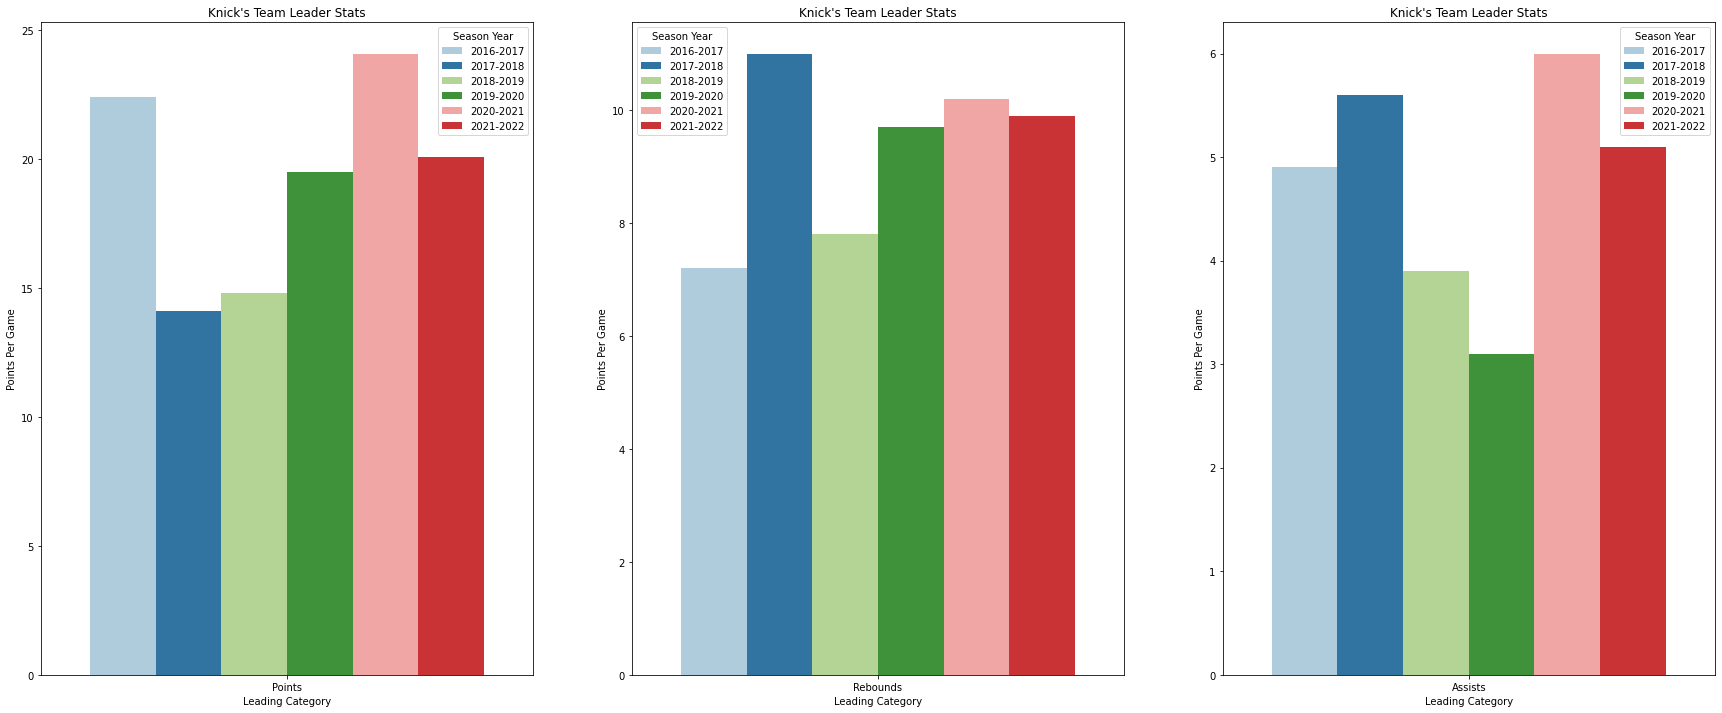

In [227]:
fig, axes = plt.subplots(1, 3, figsize=(30, 12))

ax0 = sns.barplot(x="Leading Category", y="Points Per Game", hue="Season Year", palette = "Paired", ax=axes[0], data=query_points)
ax1 = sns.barplot(x="Leading Category", y="Points Per Game", hue="Season Year", palette = "Paired", ax=axes[1], data=rebound_points)
ax2 = sns.barplot(x="Leading Category", y="Points Per Game", hue="Season Year", palette = "Paired", ax=axes[2], data=assists_points)

ax0.set_title("Knick's Team Leader Stats")
ax1.set_title("Knick's Team Leader Stats")
ax2.set_title("Knick's Team Leader Stats")

Text(0.5, 1.0, 'Julius Leader In Multiple Categories')

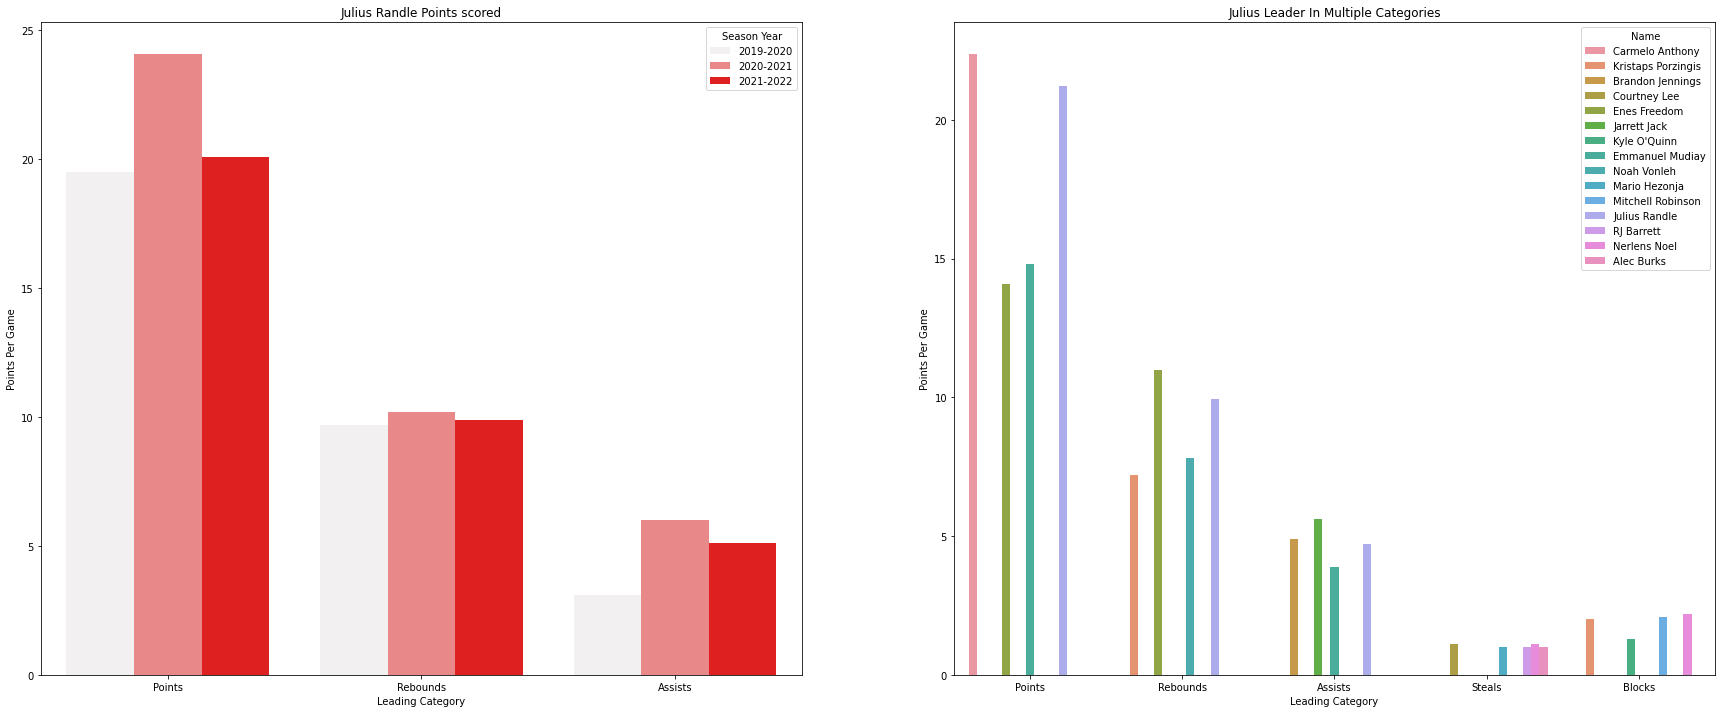

<Figure size 720x576 with 0 Axes>

In [239]:
fig, axes2 = plt.subplots(1, 2, figsize=(30, 12))

plt.figure(figsize= (10, 8))
ax3 = sns.barplot(x="Leading Category", y="Points Per Game", hue="Season Year", color = "red", ax=axes2[0], data=julius_points)
ax4 = sns.barplot(x="Leading Category", y="Points Per Game", hue="Name", ax=axes2[1], ci = None, data=final_df)

ax3.set_title("Julius Randle Points scored")
ax4.set_title("Julius Leader In Multiple Categories")

Text(0.5, 1.0, 'Leading Players for Points Per Game by Season')

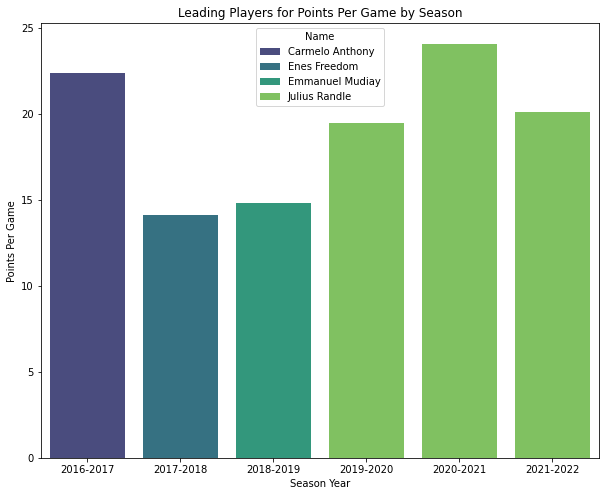

In [256]:
plt.figure(figsize= (10, 8))
ax5 = sns.barplot(x="Season Year", y="Points Per Game", hue= "Name", dodge = False, palette = "viridis", data=query_points)
ax5.set_title("Leading Players for Points Per Game by Season")
